In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import os

In [2]:
os.environ['IEX_API_KEY'] = "pk_52df9024d9a34a649655db298e9301b6"

In [3]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,3,15)

In [4]:
tesla = web.DataReader('TSLA', 'iex',start,end)

In [5]:
tesla.tail()

,open,high,low,close,volume
date,,,,,
2021-03-09,608.18,678.09,595.2100,673.58,67523328
2021-03-10,700.30,717.85,655.0600,668.06,60605672
2021-03-11,699.40,702.50,677.1800,699.60,36253892
2021-03-12,670.00,694.88,666.1394,693.73,33583840
2021-03-15,694.09,713.18,684.0400,707.94,29423479


In [6]:
ford = web.DataReader('F', 'iex', start, end)
gm = web.DataReader('GM', 'iex', start, end)

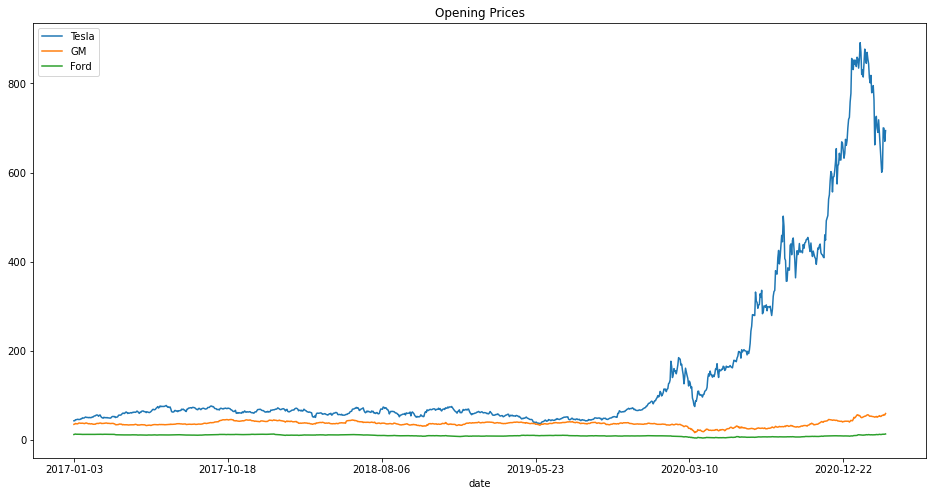

In [7]:
tesla['open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['open'].plot(label='GM')
ford['open'].plot(label='Ford')
plt.legend();

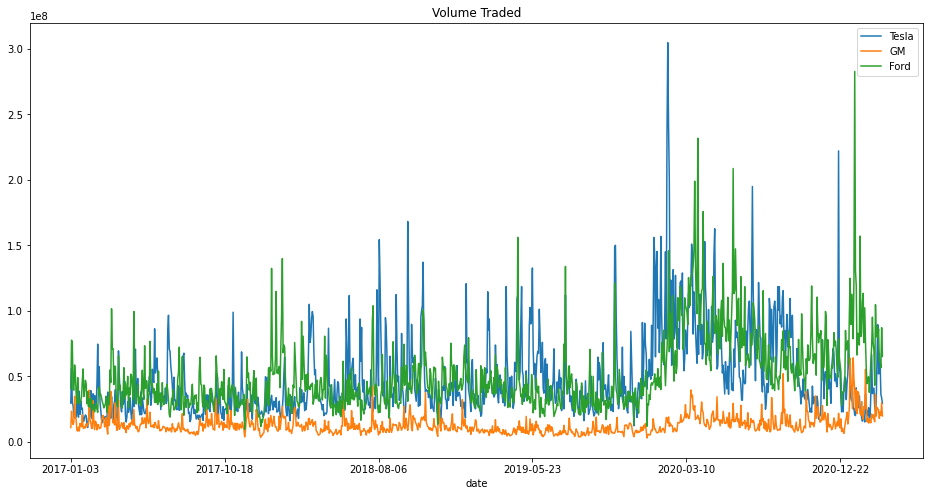

In [8]:
tesla['volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['volume'].plot(label='GM')
ford['volume'].plot(label='Ford')
plt.legend();

In [9]:
ford['volume'].argmax()

1019

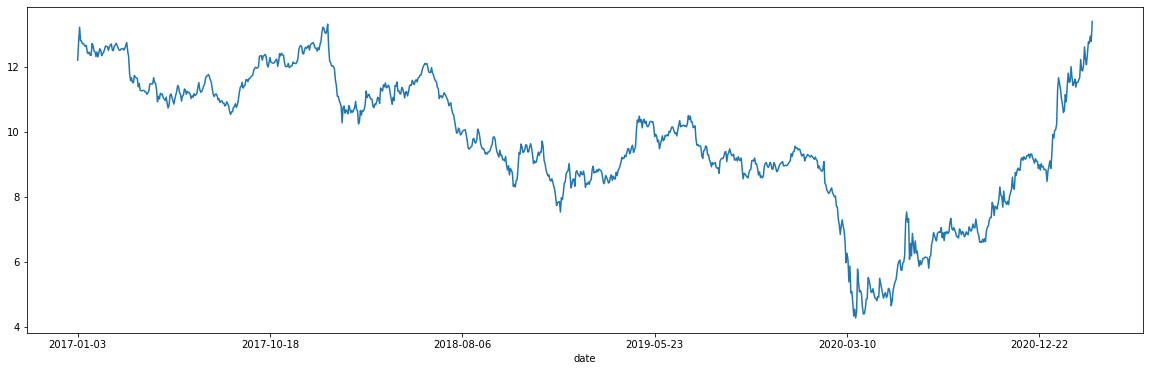

In [10]:
ford['open'].plot(figsize=(20,6));

In [11]:
tesla['total traded'] = tesla['open']*tesla['volume']
ford['total traded'] = ford['open']*ford['volume']
gm['total traded'] = gm['open']*gm['volume']

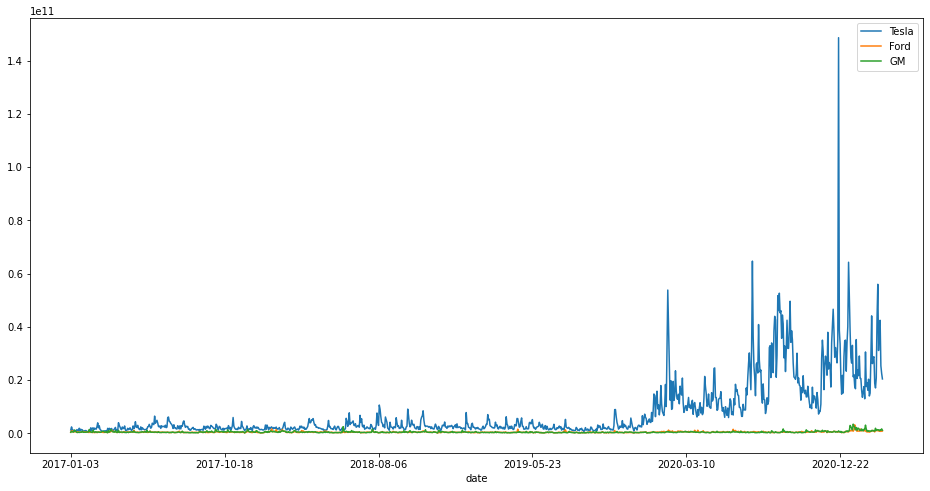

In [12]:
tesla['total traded'].plot(figsize=(16,8), label='Tesla')
ford['total traded'].plot(figsize=(16,8), label='Ford')
gm['total traded'].plot(figsize=(16,8), label='GM')
plt.legend();

In [13]:
tesla['total traded'].idxmax()

'2020-12-18'

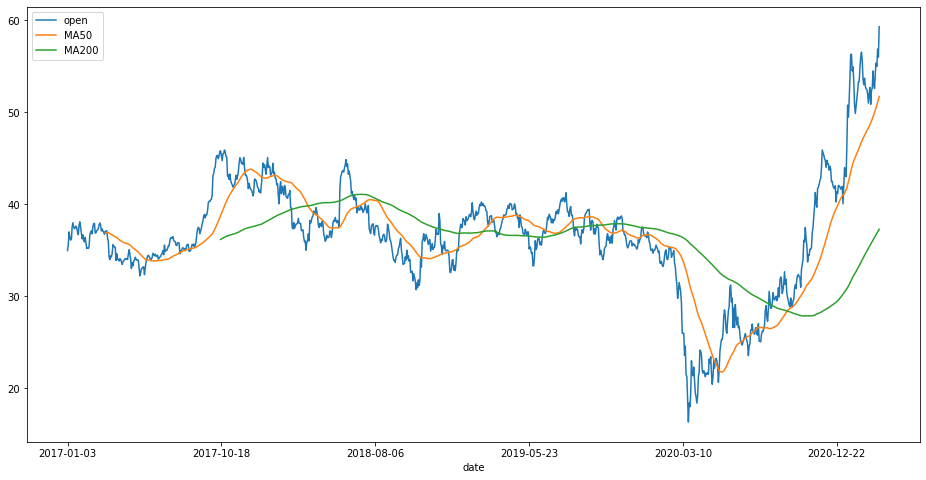

In [14]:
gm['MA50'] = gm['open'].rolling(50).mean()
gm['MA200'] = gm['open'].rolling(200).mean()
gm[['open', 'MA50', 'MA200']].plot(figsize=(16,8));

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
car_comp = pd.concat([tesla['open'],ford['open'], gm['open']],axis=1)

In [17]:
car_comp.columns = ['Tesla Open', 'Ford Open', 'GM Open']

In [18]:
car_comp.head()

,Tesla Open,Ford Open,GM Open
date,,,
2017-01-03,42.972,12.20,34.98
2017-01-04,42.950,12.77,35.60
2017-01-05,45.284,13.21,37.01
2017-01-06,45.386,12.80,36.41
2017-01-09,45.794,12.79,36.12


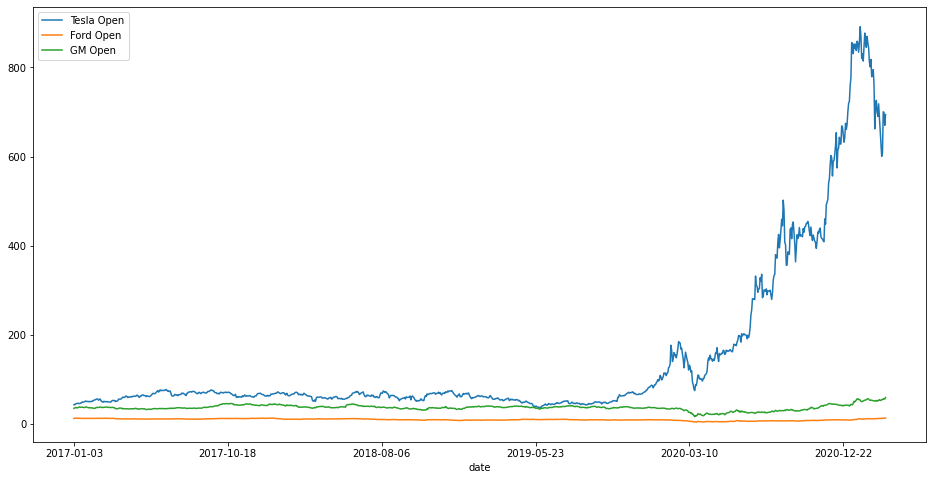

In [19]:
car_comp.plot(figsize=(16,8));

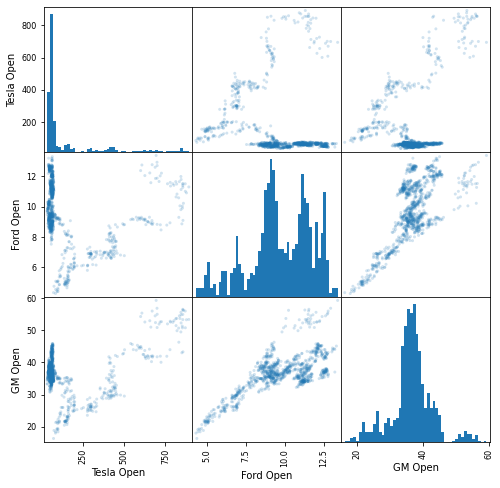

In [20]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [21]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [22]:
ford.head()

,open,high,low,close,volume,total traded
date,,,,,,
2017-01-03,12.20,12.60,12.13,12.59,40510821,4.942320e+08
2017-01-04,12.77,13.27,12.74,13.17,77638075,9.914382e+08
2017-01-05,13.21,13.22,12.63,12.77,75628443,9.990517e+08
2017-01-06,12.80,12.84,12.64,12.76,40315887,5.160434e+08
2017-01-09,12.79,12.86,12.63,12.63,39438393,5.044170e+08


In [23]:
ford_reset = ford.loc['2012-01':'2012-2'].reset_index()

In [24]:
ford_reset.head()

,date,open,high,low,close,volume,total traded


In [25]:
tesla['returns'] = (tesla['close'] / tesla['close'].shift(1)) - 1

In [26]:
tesla['returns'] = tesla['close'].pct_change(1)
ford['returns'] = ford['close'].pct_change(1)
gm['returns'] = gm['close'].pct_change(1)

In [27]:
tesla['returns']

date
2017-01-03         NaN
2017-01-04    0.046085
2017-01-05   -0.001057
2017-01-06    0.009967
2017-01-09    0.009912
                ...   
2021-03-09    0.196412
2021-03-10   -0.008195
2021-03-11    0.047211
2021-03-12   -0.008391
2021-03-15    0.020483
Name: returns, Length: 1056, dtype: float64

In [28]:
ford.head()

,open,high,low,close,volume,total traded,returns
date,,,,,,,
2017-01-03,12.20,12.60,12.13,12.59,40510821,4.942320e+08,NaN
2017-01-04,12.77,13.27,12.74,13.17,77638075,9.914382e+08,0.046068
2017-01-05,13.21,13.22,12.63,12.77,75628443,9.990517e+08,-0.030372
2017-01-06,12.80,12.84,12.64,12.76,40315887,5.160434e+08,-0.000783
2017-01-09,12.79,12.86,12.63,12.63,39438393,5.044170e+08,-0.010188


<AxesSubplot:>

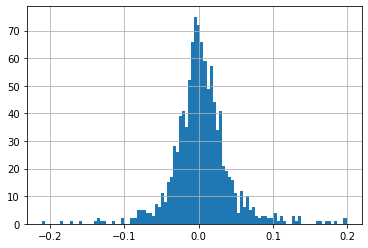

In [29]:
tesla['returns'].hist(bins=100)

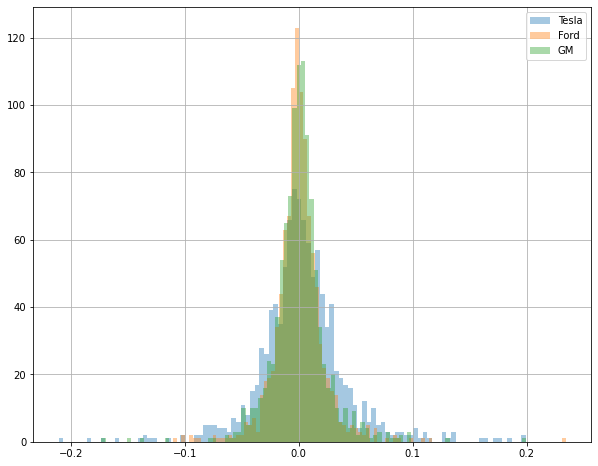

In [30]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=.4)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=.4)
plt.legend();

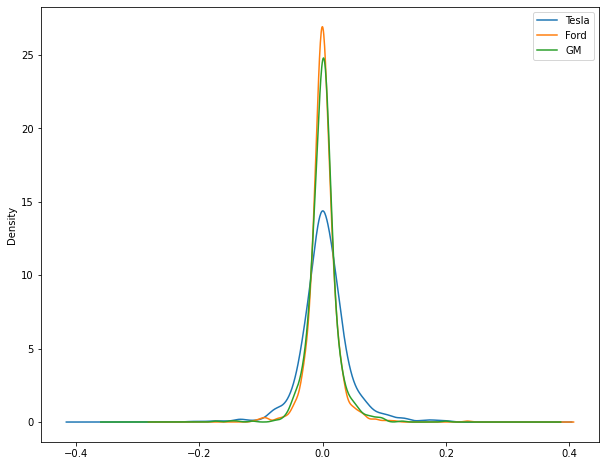

In [31]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10,8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(10,8))
gm['returns'].plot(kind='kde', label='GM', figsize=(10,8))
plt.legend();

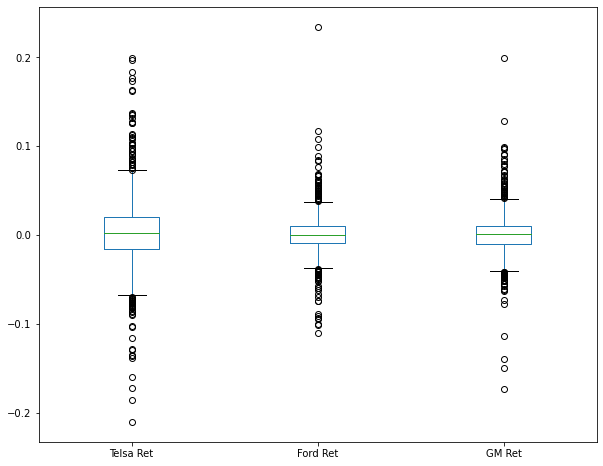

In [33]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']], axis=1)
box_df.columns = ['Telsa Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind='box', figsize=(10,8));

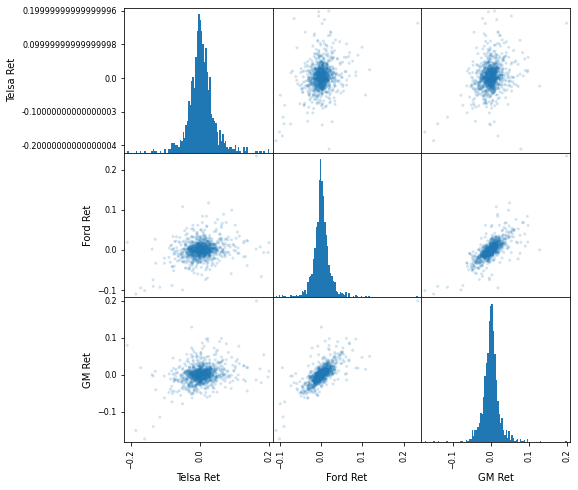

In [37]:
scatter_matrix(box_df,figsize=(8,8),alpha=.2,hist_kwds={'bins':100});

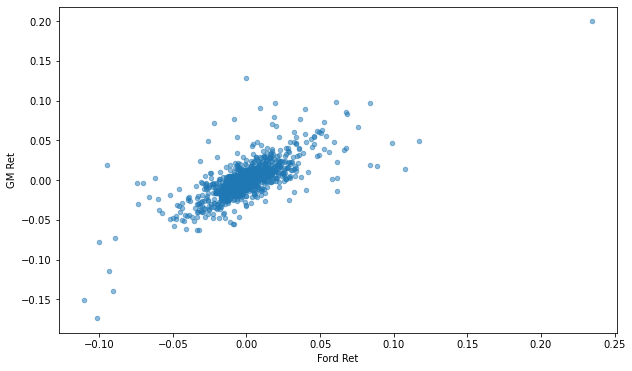

In [34]:
box_df.plot(kind='scatter', x='Ford Ret',y='GM Ret',alpha=.5,figsize=(10,6));

In [35]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [36]:
ford

,open,high,low,close,volume,total traded,returns,Cumulative Return
date,,,,,,,,
2017-01-03,12.20,12.6000,12.1300,12.59,40510821,4.942320e+08,NaN,NaN
2017-01-04,12.77,13.2700,12.7400,13.17,77638075,9.914382e+08,0.046068,1.046068
2017-01-05,13.21,13.2200,12.6300,12.77,75628443,9.990517e+08,-0.030372,1.014297
2017-01-06,12.80,12.8400,12.6400,12.76,40315887,5.160434e+08,-0.000783,1.013503
2017-01-09,12.79,12.8600,12.6300,12.63,39438393,5.044170e+08,-0.010188,1.003177
...,...,...,...,...,...,...,...,...
2021-03-09,12.76,12.7600,12.3750,12.57,61568655,7.856160e+08,-0.006324,0.998411
2021-03-10,12.72,12.9800,12.6200,12.91,62111181,7.900542e+08,0.027049,1.025417
2021-03-11,12.94,13.0594,12.7500,12.81,56536460,7.315818e+08,-0.007746,1.017474


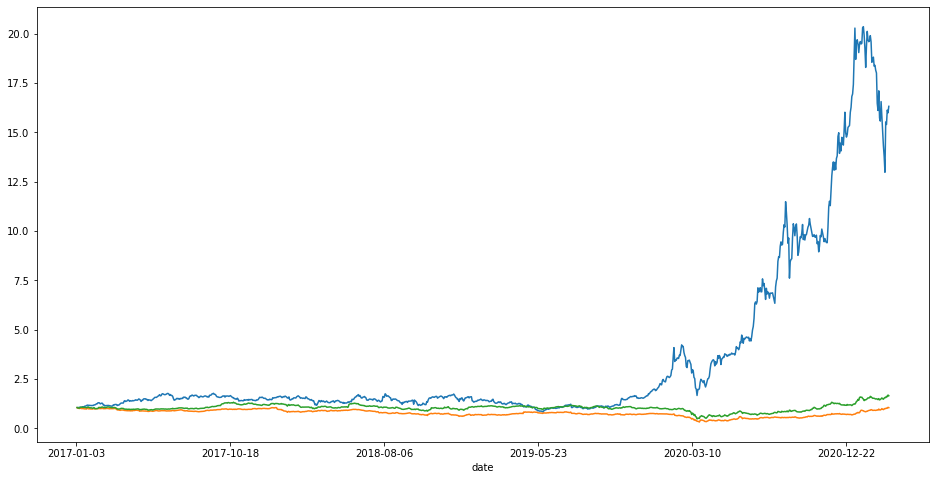

In [37]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford',figsize=(16,8))
gm['Cumulative Return'].plot(label='Gm',figsize=(16,8));